### Problem Statement: To predict the sales of a product based on the modes of advertising (TV, Radio, Newspaper).

In [6]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [7]:
#Read input data
df = pd.read_csv('advertising.csv')

In [8]:
#Display first 10 rows
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


### Observation: Sales is the target feature (Y)
### 'TV', 'Radio' and 'Newspaper' are the independent features (X)

In [9]:
#Find empty values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
#Find the datatypes
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [11]:
#Obtain the rows and columns
df.shape

(200, 4)

In [12]:
#Obtain further information about data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


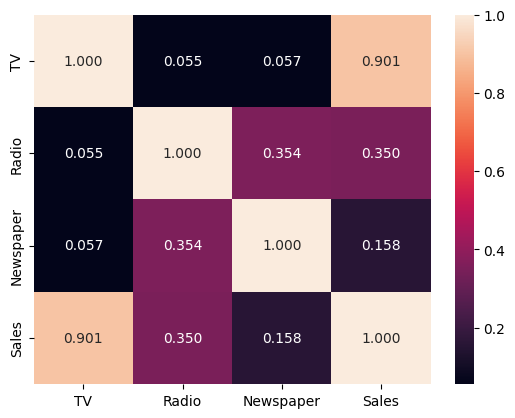

In [13]:
#plot the correlation
sb.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

In [14]:
X = df.drop('Sales', axis=1)
Y = df['Sales']

In [15]:
X.shape

(200, 3)

In [16]:
#Check for multicollinearity using VIF
#Create a dataframe which has column names and associated VIF value for each column.
vif_df = pd.DataFrame({'Variable': X.columns, 
                       'VIF' : [vif(X.values, i) for i in range(X.shape[1])]
                      })

In [17]:
vif_df

,Variable,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


### Observation: In general, a VIF value greater than 5 is considered to have multicollinearity. In our case, none of the variables have any VIF > 5. So, there is no multicollinearity.

In [18]:
X_30 = X.copy()
Y_30 = Y.copy()

### 80/20 split

In [19]:
#Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
#Multiple Linear Regression
lr = LinearRegression() #Model Building
lr.fit(X_train, Y_train) #Model Training

LinearRegression()

In [21]:
#Find the line slope
lr.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [22]:
#FInd the line intercept
lr.intercept_

np.float64(4.714126402214129)

### Best fit line: Y(Sales) = 0.055*X1(TV) + 0.1*X2(Radio) + 0.004*X3(Newspaper) + 4.714

In [23]:
#Predict data
Y_pred = lr.predict(X_test)
Y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [24]:
#Dataframe for predicted and actual values
results_diff = pd.DataFrame({'Predicted Value': Y_pred, 'Actual Value': Y_test})
results_diff

,Predicted Value,Actual Value
95,17.034772,16.9
15,20.409740,22.4
30,23.723989,21.4
158,9.272785,7.3
128,21.682719,24.7
115,12.569402,12.6
69,21.081195,22.3
170,8.690350,8.4
174,17.237013,16.5
45,16.666575,16.1


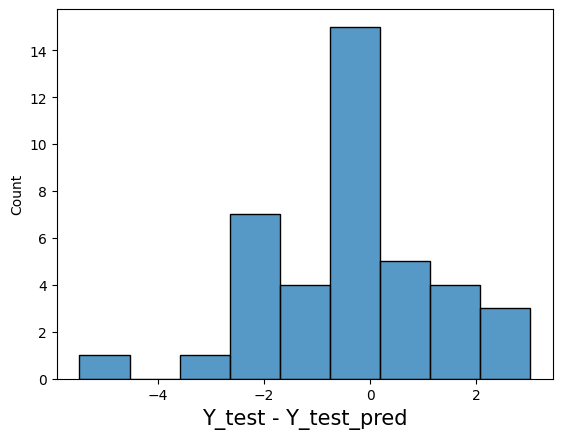

In [25]:
#Plot the histogram for the error/cost function
fig = plt.figure()
sb.histplot(Y_test - Y_pred)
plt.xlabel('Y_test - Y_test_pred', fontsize = 15)
plt.show()

In [26]:
#Compute the metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 coefficient: ', r2)

Mean Absolute Error:  1.274826210954934
Mean Squared Error:  2.907756910271091
R2 coefficient:  0.9059011844150826


### 70/30 split

In [27]:
X_30_train, X_30_test, Y_30_train, Y_30_test = train_test_split(X_30, Y_30, test_size=0.3, random_state=42)

In [28]:
X_30_train.shape

(140, 3)

In [29]:
X_30_test.shape

(60, 3)

In [30]:
lr_30 = LinearRegression()
lr_30.fit(X_30_train, Y_30_train)

LinearRegression()

In [31]:
Y_30_pred = lr_30.predict(X_30_test)
Y_30_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [32]:
lr_30.coef_

array([0.05358869, 0.10270677, 0.00793167])

In [33]:
results_diff = pd.DataFrame({'Predicted Value': Y_30_pred, 'Actual Value': Y_30_test})
results_diff

,Predicted Value,Actual Value
95,17.159919,16.9
15,20.533695,22.4
30,23.689144,21.4
158,9.519146,7.3
128,21.607368,24.7
115,12.781013,12.6
69,21.086363,22.3
170,8.760542,8.4
174,17.115000,16.5
45,16.687896,16.1


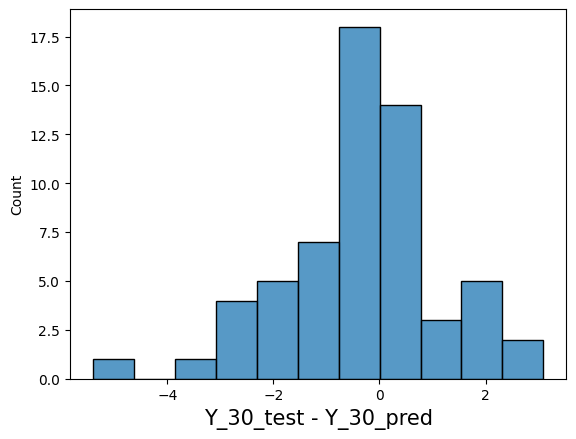

In [34]:
fig = plt.figure()
sb.histplot(Y_30_test - Y_30_pred)
plt.xlabel('Y_30_test - Y_30_pred', fontsize = 15)
plt.show()

In [35]:
#Compute the metrics
mae_30 = mean_absolute_error(Y_30_test, Y_30_pred)
mse_30 = mean_squared_error(Y_30_test, Y_30_pred)
r2_30 = r2_score(Y_30_test, Y_30_pred)

print('Mean Absolute Error: ', mae_30)
print('Mean Squared Error: ', mse_30)
print('R2 coefficient: ', r2_30)

Mean Absolute Error:  1.1594875061090584
Mean Squared Error:  2.541624036229148
R2 coefficient:  0.9091484341849799


### Conclusion: Out of 80/20 and 70/30 split, 70/30 split is considered as a best model since there is an increase in the R2 score by 0.4% and also a decrease in the MAE and MSE. 
### Always choose a regression model which has R2 score closer to 1 and less error.